In [2]:
#READING THE ORIGINAL DATASET 
import pandas as pd
df = pd.read_csv('C:/Users/DELL/Desktop/aiproject/WQI_Results_on_Dataset.csv') 
df.describe()

,Years,Alkalinity-total (as CaCO3),Ammonia-Total (as N),BOD - 5 days (Total),Chloride,Conductivity @25°C,Dissolved Oxygen,ortho-Phosphate (as P) - unspecified,pH,Temperature,Total Hardness (as CaCO3),True Colour,CCME_Values,WAWQI_Values,Horton_values,Brown_values,SRDD_values
count,29159.000000,29159.000000,29159.000000,29159.000000,29159.000000,29159.000000,29159.000000,29159.000000,29159.000000,29159.000000,29159.000000,29159.000000,29159.000000,29159.000000,29159.000000,29159.000000,29159.000000
mean,2014.782537,139.858348,0.063573,1.276861,20.257858,363.039081,58.286184,0.068789,7.552057,10.850503,159.092110,58.137464,72.553051,-21.101423,71.500750,87.144180,75.992116
std,4.441425,95.554543,0.441630,0.559890,19.127637,182.190019,26.946092,1.010133,0.581265,5.179973,99.937379,52.913140,8.488478,1803.371553,26.550722,7.889609,19.598980
min,2007.000000,0.000000,0.000000,0.000000,0.000000,33.000000,0.000000,-0.004000,4.700000,0.600000,0.000000,0.000000,34.331332,-124865.330270,16.927273,49.715918,-704.022584
25%,2011.000000,55.000000,0.033000,1.200000,15.600000,229.000000,49.400000,0.017000,7.200000,8.200000,71.000000,25.000000,65.926488,62.647739,50.636364,80.934503,64.708274
50%,2015.000000,127.000000,0.033000,1.200000,18.600000,356.000000,54.900000,0.019000,7.700000,10.700000,152.000000,45.000000,73.224840,68.150397,67.936364,88.313078,81.266927
75%,2018.000000,214.000000,0.033000,1.200000,22.000000,501.000000,75.000000,0.022000,8.000000,13.100000,237.000000,74.000000,78.557888,72.626215,91.136364,94.181365,90.667073
max,2023.000000,442.000000,40.000000,16.000000,1260.000000,4200.000000,198.000000,70.000000,9.800000,637.000000,642.000000,953.000000,100.000000,110.571361,530.872727,99.247424,98.884619


In [4]:
# Count the number of rows for each WAWQI
label_counts = df['WAWQI'].value_counts().sort_index()

# Optional: Map numeric labels to names if you use label_mapping
label_mapping = {
    0: 'Excellent',
    1: 'Fair',
    2: 'Good',
    3: 'Moderate',
    4: 'Poor',
    5: 'Unsuitable'
}

# Display counts with labels
for label, count in label_counts.items():
    print(f"{label_mapping.get(label, label)} ({label}): {count} rows")


Excellent (Excellent): 4166 rows
Fair (Fair): 3035 rows
Good (Good): 17947 rows
Moderate (Moderate): 1315 rows
Poor (Poor): 456 rows
Unsuitable (Unsuitable): 2240 rows


In [13]:
# Keep only relevant columns
from sklearn.preprocessing import LabelEncoder

columns_to_keep = [
    'Alkalinity-total (as CaCO3)', 'Ammonia-Total (as N)', 'BOD - 5 days (Total)',
    'Conductivity @25°C', 'pH', 'Total Hardness (as CaCO3)', 'WAWQI'
]

df = df[columns_to_keep]

# Drop rows with any missing values
df = df.dropna()

# Show the cleaned dataframe shape
print("Cleaned dataset shape:", df.shape)

# Encode the WAWQI labels to numbers
label_encoder = LabelEncoder()
df['WAWQI_Label'] = label_encoder.fit_transform(df['WAWQI'])

# Save the cleaned dataset to a new file
output_file = 'C:/Users/DELL/Desktop/aiproject/Cleaned_WQI_Dataset.csv'
df.to_csv(output_file, index=False)

# Show label encoding mapping
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label mapping:", label_mapping)
print("Saved cleaned dataset to:", output_file)

Cleaned dataset shape: (29159, 7)
Label mapping: {'Excellent': 0, 'Fair': 1, 'Good': 2, 'Moderate': 3, 'Poor': 4, 'Unsuitable': 5}
Saved cleaned dataset to: C:/Users/DELL/Desktop/aiproject/Cleaned_WQI_Dataset.csv


In [14]:
df.head()

,Alkalinity-total (as CaCO3),Ammonia-Total (as N),BOD - 5 days (Total),Conductivity @25°C,pH,Total Hardness (as CaCO3),WAWQI,WAWQI_Label
0,314.0,0.033,1.2,711.0,7.80,370.0,Good,2
1,14.0,0.033,1.2,71.0,7.42,13.4,Good,2
2,17.0,0.033,1.2,79.0,7.67,15.8,Good,2
3,18.0,0.033,1.2,78.0,7.63,15.9,Good,2
4,19.0,0.033,1.2,76.0,7.33,15.4,Good,2


In [15]:
df.describe()

,Alkalinity-total (as CaCO3),Ammonia-Total (as N),BOD - 5 days (Total),Conductivity @25°C,pH,Total Hardness (as CaCO3),WAWQI_Label
count,29159.000000,29159.000000,29159.000000,29159.000000,29159.000000,29159.000000,29159.000000
mean,139.858348,0.063573,1.276861,363.039081,7.552057,159.092110,1.917007
std,95.554543,0.441630,0.559890,182.190019,0.581265,99.937379,1.211514
min,0.000000,0.000000,0.000000,33.000000,4.700000,0.000000,0.000000
25%,55.000000,0.033000,1.200000,229.000000,7.200000,71.000000,2.000000
50%,127.000000,0.033000,1.200000,356.000000,7.700000,152.000000,2.000000
75%,214.000000,0.033000,1.200000,501.000000,8.000000,237.000000,2.000000
max,442.000000,40.000000,16.000000,4200.000000,9.800000,642.000000,5.000000


In [16]:
df.isnull().sum()

Alkalinity-total (as CaCO3)    0
Ammonia-Total (as N)           0
BOD - 5 days (Total)           0
Conductivity @25°C             0
pH                             0
Total Hardness (as CaCO3)      0
WAWQI                          0
WAWQI_Label                    0
dtype: int64

<Axes: xlabel='WAWQI_Label', ylabel='count'>

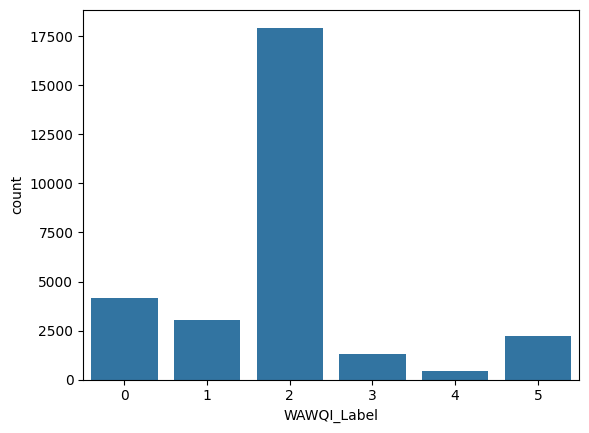

In [17]:
import seaborn as sns
sns.countplot(x="WAWQI_Label",data=df)

In [18]:
df["WAWQI_Label"].value_counts()

WAWQI_Label
2    17947
0     4166
1     3035
5     2240
3     1315
4      456
Name: count, dtype: int64

In [19]:
print(df.columns)
print(df['WAWQI_Label'].dtype)


Index(['Alkalinity-total (as CaCO3)', 'Ammonia-Total (as N)',
       'BOD - 5 days (Total)', 'Conductivity @25°C', 'pH',
       'Total Hardness (as CaCO3)', 'WAWQI', 'WAWQI_Label'],
      dtype='object')
int32
